**Membaca File**

In [ ]:

import pandas as pd

df_review = pd.read_csv("/content/shopee_sept_mei.csv")

df_review.tail()

,userName,score,at,content
3560,Wibisone,1,10/8/2023 22:44:07,Yang paling menjengkelkan dari Shopee itu sela...
3561,Yengki,3,9/23/2023 12:11:24,"Gak tau kenapa dlu apk ini tidak lemot,skrng t..."
3562,Aida EnFebriant,4,9/13/2023 13:47:37,Sangat baik. Sebagai saran. Untuk list produk ...
3563,Feby Wulandari,1,9/9/2023 8:16:30,"Shopee makin kesini makin bad pelayanannya, ap..."
3564,Aizzan RaQila,2,9/4/2023 15:04:57,"Aplikasi lemot, terlalu banyak iklan, sekarang..."


**Preprocessing Data**

**- Labelling**

In [ ]:
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
          return 'netral'
    else:
        return 'positif'


df_review['sentiment'] = df_review['score'].apply(label_sentiment)
df_review.tail()
df_review.to_csv("data_shopee_2.csv", index=False)

**- Case Folding**

In [ ]:
import pandas as pd
import re
import string

def lowercase(text):
    text = text.lower()
    pattern = r'[^a-z\s.,;!?/+\\=\(\)\*&\^%$#@\'\[\]-]'
    clean_text = re.sub(pattern, '', text)

    return clean_text

def add_spasi(text):
    text = re.sub(r'([.,;!?:+/\\=\(\)\*&\^%$#@\'\[\]-])', r' \1 ', text)
    return text

def remove_spasi(text):
    clean_text = re.sub(r'\s+', ' ', text)
    return clean_text.strip()

df = pd.read_csv("data_shopee_2.csv")

df['lowercase'] = df['content'].apply(lowercase)
df['lowercase'] = df['lowercase'].apply(add_spasi)
df['lowercase'] = df['lowercase'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['lowercase'] = df['lowercase'].apply(remove_spasi)

df.to_csv("/content/lowercase.csv", index=False)

print(df['lowercase'].head())


0    padahal dulu secinta itu sama shopee karena le...
1    bagus terpercaya tapi satu kendala saat saya m...
2    ini kenapa saldo penjual saya kena penyesuaian...
3    shopee tuh sekarang kenapa ya tampilan spinjam...
4    fiturnya gampang di mengerti shopee sekarang l...
Name: lowercase, dtype: object


**- Data Cleaning**

In [ ]:
from collections import Counter

df= pd.read_csv("/content/lowercase.csv")

def normalize_abbreviations(text, abbreviation_dict):
    words = text.split()
    normalized_words = []
    for word in words:
        normalized_word = abbreviation_dict.get(word, word)
        if isinstance(normalized_word, list):
            normalized_words.extend(normalized_word)
        else:
            normalized_words.append(normalized_word)
    return ' '.join(normalized_words)

abbreviation_dict = {
    "sosmed":"sosial media","shoppe":"shopee","shope":"shopee","cs":"customer service","apk":"aplikasi","app":"aplikasi","mager":"malas gerak","minim":"minimal","gercep":"gerak cepat","gratong":"gratis ongkos","samsek":"sama sekali","mantul":"mantap betul","ongkir":"ongkos kirim","ori":"original","appnya":"aplikasinya","shopy":"shopee","apl":"aplikasi","lemot":"lambat",'aq':"saya","g":"tidak","yg":"yang","lemotnya":"lambatnya","yt":"youtube","penangan":"penanganan","pesen":"pesan","tetep":"tetap","bener":"benar","sampe":"sampai","serasa":"terasa","dapet":"dapat","kayak":"seperti", "aja":"saja","nyampe":"sampai","pdahal":"padahal","pdhal":"padahal","kdang":"kadang","rp":"rupiah","fiturnya":"fitur","pake":"pakai","aktifin":"mengaktifkan","doang":"saja","pencet":"tekan","voucer":"voucher","vocer":"voucher","nempel":"menempel","nyari":"mencari","rb":"ribu","tp":"tapi","sbg":"sebagai","tsb":"tersebut","tlpn":"telepon","saranin":"menyarankan","males":"malas","balikin":"mengembalikan","pokonya":"pokoknya","nyesel":'menyesal',"karna":"karena","emng":"memang","skrng":"sekarang","orng":"orang","pdhl":"padahal","brng":"barang","blanja":"belanja","baguss":"bagus","spayleter":"spaylater","hrs":"harus","ntah":"entah","ajah":"saja","shopi":"shopee","emang":"memang","lola":"loading lama","gamasuk":"tidak masuk","gmana":"bagaimana","cepet":"cepat", "gmn":"bagaimana","shoope":"shopee","ttp":"tetap","dateng":"datang","shopie":"shopee","skali":"sekali","nunggunya":"menunggunya","ngalamin":"mengalami","ngirim":"mengirim","syang":"sayang","maksa":"memaksa","pengen":"ingin","ngeselin":"menyebalkan","narik":"menarik","seneng":"senang","temen":"teman","abis":"habis","krn":'karena',"sebel":"sebal","gajelas":"tidak jelas","ilangin":"menghilangkan","jdi":"jadi","nganterin":"mengantarkan","ngecewain":"mengecewakan","settingan":"setting","tlg":"tolong","spxnya":"spx","kenceng":"kencang","pembelinya":"pembeli","brg":"barang","gbisa":"tidak bisa","biarpun":"meskipun", "dlm":"dalam","bersihin":"membersihkan","prnah":"pernah","dtg":"datang","tnpa":"tanpa","ngerti":"mengerti","byk":"banyak","bnyk":"banyak","hrga":"harga","lbh":"lebih","stelah":"setelah","mulu":"terus","kasi":"kasih","nyoba":"coba","thn":"tahun","dipakai":"dipakai","spinjamnya":"spinjam","ngambil":"mengambil","gaada":"tidak ada","tgl":"tanggal","knp":"kenapa","smoga":"semoga","ancur":"hancur","apain":"apa","belom":"belum","gada":"tidak ada","cpt":"cepat","sllu":"selalu","smua":"semua","nomer":"nomor","dibalikin":"dikembalikan","kwalitas":"kualitas","shopeee":"shopee","milih":"memilih","ongkirnya":"ongkos kirimnya","kyk":"seperti","tlong":"tolong","nyampenya":"sampai","msih":"masih","sophee":"shopee","ngasih":"memberi","pengirimanya":"pengirimannya","shoppee":"shopee","trimakasih":"terima kasih","gede":"besar","dinaikin":"dinaikkan","naikin":"dinaikkan","krna":"karena","vocher": "voucher","mslh": "masalah","smpai": "sampai","kemaren": "kemarin","sebenernya": "sebenarnya","menganggu": "mengganggu","kurangin": "kurangi","perbaikin": "perbaiki","kya":"seperti","pakek": "pakek","sprti": "seperti","lagii": "lagi","pke": "pakai","blm": "belum","sgt": "sangat","apknya": "aplikasinya","spaylaternya":"spaylater","nambah":"tambah","aj":"saja","mkin": "makin","mengunakan":"menggunakan","lma": "lama","dpt": "dapat","ngumpulin": "mengumpulkan","dibenerin": "diperbaiki","datengnya": "datangnya","gamau": "tidak mau","kebeli":"terbeli","shopeenya":"shopee","dishopee":"shopee","kesel":"kesal","stlh":"setelah","promonya":"promo","ngabisin":"menghabiskan","perhatiin":"perhatikan","msh":"masih","ksh":"kasih","komen":"komentar","kdg":"kadang","kdng":"kadang","sopi":"shopee","diberitahu":"beritahu","payleter":"paylater","kenpa":"kenapa","tf":"transfer","nanggung":'tanggung',"alesan":"alasan","paylaternya":"paylater","ditangan":"ditangani","ngerespon":"merespons","nyebelin":"menyebalkan","slalu":"selalu","bnr":"benar","bgs":"bagus","lsg":"langsung","tlp":"telepon","jkt":"jakarta","ngasi":"memberi","lemottt":"lambat","mmg":"memang","blnja":"belanja","laen":"lain","spek":'spesifikasi',"shoopee":"shopee","knapa":'kenapa',"knpa":"kenapa","pinter":"pintar","skrang":'sekarang',"bgini":"seperti ini","drmh":"di rumah","td":"tadi","makasih":"terima kasih","telpon":"telepon","malem":"malam","shopiee":"shopee","ngantar":'mengantar',"nungguin":"menunggu","memasukan":"memasukkan","batalin":"dibatalkan","telfon":"telepon","trima":"terima","hrus":"harus","kluar":"keluar","cape":"lelah","menggangu":"mengganggu","turunin":"diturunkan","ntar":"nanti","ngaruh":"mempengaruhi","nambahin":"menambahkan","hubungin":"menghubungi","ngerugiin":"merugikan","benerin":'diperbaiki',"hr":"hari","kudu":"harus","sampek":"sampai","apps":"aplikasi","bs":"bisa","bbrp":"beberapa","make":"memakai","bandingin":"membandingkan","bnyak":"banyak","nyuruh":"menyuruh","gpp":"tidak apa apa","ap":"apa","bisaa":"bisa","gmna":"bagaimana","ttep":"tetap","biarin":"membiarkan","hpus":"hapus","gituu":"begitu","truss":"terus","sndiri":"sendiri","ush":"usah","ngulang":"mengulang","dihapusin":"dihapus","sndri":"sendiri","ad":"ada","bgus":"bagus","kmrn":"kemarin","masi":"masih","cb":"coba","org":"orang","sudh":"sudah","gapernah":"ga pernah","tbtb":"tiba tiba","teruss":"terus","brp":"berapa","telp":"telepon","bru":"baru","sja":"saja","padahl":"padahal","uda":"sudah","liatin":"melihat","shopeeku":"shopee","bgtu":"begitu","mesen":"memesan","nongol":"muncul","brang":"barang","kenak":"kena","br":"baru","lgsg":"langsung","anter":"antar","jln":"jalan","masukin":"memasukkan","direspon":"direspons","nipu":"menipu","kembaliin":"kembalikan","trmksh":"terima kasih","nunggu":"menunggu","muter":"putar","udah":"sudah","shopping":"shop","livenya":"live","diupdate":"update","ngecek":"cek","ngelag":"lag","ngebug":"bug","cuman":"hanya","ekpres":"express","nyimpan":"menyimpan","mendownload":"download","verivikasi":"verifikasi","bugnya":"bug","skarang":"sekarang","prnh":"pernah","dirmh":"di rumah","unceklis":"unchecklist","kechecklist":"checklist","unistal":"uninstall","doble":"double","unistall":"uninstall","uninstal":"uninstall","servernya":"server","searching":"search","scrol":"scroll","sempet":"sempat","ngeblank":"blank","mencet":"pencet","latter":"later","pesenan":"pesanan","vouchernya":"voucher","lodingnya":"loding","rada":"agak","numpuk":"menumpuk","ajuin":"ajukan","dilakuin":"dilakukan","hapusin":"menghapus","hilangin":"menghilangkan","mksh":"terima kasih","nerima":"terima","nyalahin": "menyalahkan","dengerin": "mendengarkan","dishope": "di shopee","matiin": "matikan","lamaaa": "lama","pergerakan": "gerak","sukaa": "suka","bnget": "banget","naek": "naik","bner": "benar","stak": "stuck","nyusahin": "menyusahkan","gunain": "guna","nganter": "mengantar","merespon": "respons", "ruwet": "ribet","seler": "seller","priksa": "periksa","gni": "begini","ktika": "ketika","kepake": "kepakai","bgitu": "begitu","trimksh": "terima kasih","blom": "belum","butuhin": "butuhkan", "byr": "bayar","responnya": "respons","ngutang": "berhutang", "adaa": "ada","vochernya": "voucher", "keluarin": "keluarkan","kta": "kita","tb": "tiba","kpn": "kapan", "akn": "akan","direfresh":"refresh",'nmr':"nomor","dikenali":"dikenal","sblm":"sebelum","sampenya":"sampainya","smakin":"semakin","pd":"pada","ortu":"orang tua","ngajuin":"mengajukan","ikutin":"mengikuti","dapetnya":"dapatnya","soppe":"shopee","skr":"sekarang","updatenya":"update","anterin":"mengantarkan","gamenya":"game","smg":"semoga","lamaa":"lama","ngeklik":"klik","banyakin":"banyak","kpd":"kepada","kmi":"kami","jls":"jelas","max":"maksimal","segini":"begini","xpress":"express","th":"tahun","adakan":"mengadakan","gratongnya":"gratis ongkosnya","vitur":"fitur","ngelek":"lag","sll":"selalu","slh":"salah","napa":"kenapa","ngapusin":"menghapus","ketipu":"tertipu","dikembaliin":"dikembalikan","bayangin":"bayangkan","pengeriman":"pengiriman","indo":"indonesia","complain":"komplain","emg":"memang","skg":"sekarang","ngilangin":"menghilangkan","maap":"maaf","reting":"rating","jngn":"jangan","ngapus":"menghapus","ngikutin":"mengikuti","dteng":"datang","lngsung":"langsung","nnti":"nanti","erorr":"error","tambahin":"tambahkan","blum":"belum","digunain":"digunakan","sopee":"shopee","negri":"negeri","skli":"sekali","lemott":"lemot","kranjang":"keranjang","dapetin":"mendapatkan","lwt":"lewat","pernh":"pernah","mlah":"malah","msuk":"masuk","sekrg":"sekarang","dibanyakin":"dibanyakkan","nemu":"ketemu","dimasukin":"dimasukkan","dichat":"chat","bhkan":"bahkan","sellernya":"seller","dulunya":"dulu","expedisinya":"expedisi","toped":"tokopedia","bales":"balas","bangke":"bangkai","rame":"ramai","bkin":"membuat","memposting":"posting","trims":"terima kasih","keteranganya":"keterangan","ngadu":"mengadu","ceklistnya":"ceklis","nyentang":"menyentang","sngt":"sangat","diperbaikin":"diperbaiki","belnja":"belanja","sperti":"seperti","tulisanya":"tulisannya","hri":"hari","nglag":"lag","ngerasa":"merasa","brapa":"berapa","pngiriman":"pengiriman","adminnya":"admin","ngisi":"mengisi","mesan":"memesan","dpat":"dapat","shpee":"shopee","apalgi":"apalagi","belasan":"belasan","mauu":"mau","ngatur":"mengatur","kapok":"kapok","sekrng":"sekarang","cepetan":"cepat","dibatalin":"dibatalkan","bertanggungjawab":"bertanggung jawab","syg":"sayang","shopenya":"shopee","ongkirr":"ongkos kirim","lamaaaa":"lama","jelass":"jelas","ngembaliin":"mengembalikan","mls":"malas","samasekali":"sama sekali","nyampek":"sampai","deket":"dekat","nyampai":"sampai","motong":"memotong","notifnya":"notifikasi","fto":"foto","rmh":"rumah","taik":"tahi","msalah":"masalah","lemoot":"lemot","byak":"banyak","trkirim":"terkirim","maen":"main","pkai":"pakai","tt":"tetapi","shoper":"shopee","ajjah":"saja","temenku":"temanku","tingkatin":"meningkatkan","telefon":"telepon","ditambahin":"ditambahkan","ratingnya":"rating","klian":"kalian","penggiriman":"pengiriman","perna":"pernah","serba":"serba","dipke":"dipakai","cht":"chat","shale":"sale","bbrpa":"beberapa","geratis":"gratis","ngeluh":"keluh","mantab":"mantap","dibales":"dibalas","aga":"agak","kenapaa":"kenapa","tks":"terima kasih","padhal":"padahal","gimna":"bagaimana","mn":"mana","makek":"gunakan","andro":"android","lakuin":"lakukan","dpet":"dapat","sope":"shopee","apliaksi":"aplikasi","consumen":"konsumen","rbu":"ribu","pdh":"padahal","mhl":"mahal","kaltim":"kalimantan timur","kmren":"kemarin","grtis":"gratis","makasi":"terima kasih","gatau":"tidak tau","kalo":"kalau"
}

df["abreviation"] = df["lowercase"].apply(lambda x: normalize_abbreviations(x, abbreviation_dict))


cnt = Counter()
for text in df['abreviation'].values:
 for word in text.split():
    cnt[word] += 1
frequent = set([x for x, y in cnt.items() if y > 2])
df['abreviation'] = df['abreviation'].apply(lambda x: " ".join([w for w in x.split() if w in frequent]))

df.to_csv("abreviation.csv", index=False)


**- Token & Stemming**

In [ ]:
df = pd.read_csv("/content/abreviation.csv")
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

#tokenazition
df['tokens'] = df['abreviation'].apply(lambda x: word_tokenize(x))


!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in df['tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")


def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemming'] = df['tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
df.head(20)


df.to_csv('stemming.csv', index= False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2721
------------------------
1 : padahal : padahal
2 : dulu : dulu
3 : itu : itu
4 : sama : sama
5 : shopee : shopee
6 : karena : karena
7 : lengkap : lengkap
8 : tapi : tapi
9 : sekarang : sekarang
10 : ga : ga
11 : suka : suka
12 : fitur : fitur
13 : yang : yang
14 : sering : sering
15 : double : double
16 : order : order
17 : driver : driver
18 : bikin : bikin
19 : pesanan : pesan
20 : lama : lama
21 : dan : dan
22 : lebih : lebih
23 : dari : dari
24 : estimasi : estimasi
25 : sampainya : sampai
26 : malah : malah
27 : sampai : sampai
28 : dingin : dingin
29 : makanannya : makan
30 : bagus : bagus
31 : terpercaya : percaya
32 : satu : satu
33 : kendala : kendala
34 : saat : saat
35 : saya : saya
36 : mau : mau
37 : menggunakan : guna
38 : shopeepay : shopeepay
39 : harus : harus
40 : daftar : daftar
41 : nomor : nomor
42 : sayangnya : sayang
43 : sudah : sudah
44 : hangus : hangus
45 : tolong : tolong
46 : di : di
47 : agar : agar
48 : bisa : bisa
49 : ganti : ganti
50 : akun : aku

**- Stopwords**

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

df = pd.read_csv("/content/stemming.csv")


stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_id.union(stop_words_en)

custom_stop_words = ['tuh', 'ya','ga','nya','nge','x','eh','gk','bkn','gua','bgt','tdk','dr','spt','ku','dgn','bla','jga','hah','km','dngn','dsni','tah','w','mu','gak','klw','ahh','duh','ngak','yah','jd','lho','ter','nih','lg','lgi','nggak','pas','gw','deh','ngk','dg','utk','ni','ngga','sdh','kek','yaaa','sy','klo','klu','nggk',"bsa",'skrg','p','sih','smpe','tpi','trus','eh','un','jdi','jg','lo','mah','lbih','k','si','dlu','dm','min','n','sya','sihh','yaa','inii','huhu','jugaa','jgn','bangt','mb','gabisa','nihh','oh','iya','sv','kak','akuu','yahh','trs','bangett','z','sat','set','bangettt','pulak','udh','gtu','donk','dll','meng','gt','kl','ny','tuk','b','cm','ato','mo','yng','non','dah','ko','tu','hahaha','plis','woy','xl','ok','sj','sia','ud','klau','mlh','ehh','kalu','kn','wkwk','nyaa','mimin','huhh','ndak','tdak','hadeuh','kah','jdinya','cma','hub','sm','bwt','pk','okelah','klok','woi','kli','buanget','gue','sang','l','ajah','cmn','bngt','hehe','dk','mw','kaga','ky','ama','dl','nga','u','thx','gaa','dsb','koq','banget','wi','fi','dri',"kyak","loh",'sma','aduh','sok','hai','donggg','laa','ane','ajh',"kakak",'dh','wkwkwkwk','kg','bget','sekrang','dst','ka','hy','poll','mp','e','lu','q','gausa','bln','ber','stiap','bgtt',"hadeh",'dahh','wktu','anjir','plisss','hny','hey','gausah','da','minn','lh','ajaa','eeh','msi','dehh','ng','emak','bye','udahlah','dn','ah','engga','la','papa','ja','mi','yuk','hadehhh','wk','pliss','gda','kog','rek','gbsa','payahhh','pda','lahh','ehhh','bangat','lahhh','kaka','gag','adm','kayaknya','asu','ampe','kgk','h','sip','nihhh','ayo','bang','gaes','lha','c','disni','mnta','mh','bangetttt','muah','kt','anj','kq','guys','bapuk','siii','ak','gapapa','jadii','des','ngadi','ip']

all_stop_words = stop_words.union(set(custom_stop_words))

positive_words = ['aman','baik', 'bagus', 'cinta','puas','amanah','gampang', 'lancar', 'semangat', 'senang', 'suka','seru', 'mantap','nyaman', 'terbaik', 'hebat','kualitas','lengkap','lucu','gratis','profesional','ramah','sopan','cepat','mudah','thanks','percaya','terima','kasih','terimakasih','cocok','oke','kualitas','keren']
negative_words = ['aneh','bahaya','bodoh','capek','eror','macet','dingin','gagal','kesal','komplain','hang','hati','henti','lambat','lelah','maaf','palsu','ragu','ribet','resah','rusak','sebal','sedih','sulit','susah','stuk','tunggak','tolong','lag','keluh','berat','aneh','ganggu','salah','hilang', 'ilang','problem','loading','lelet','zonk','abal','buruk', 'jelek', 'kecewa', 'marah', 'benci', 'payah', 'parah','protes','error','rugi','dikit','sumpah','jarang','malas','gila','pusing','bug','kacau','sakit','bingung','pelit','tipu','takut','nakal','kapok']

def remove_inappropriate_words(text, sentiment):
    words = text.split()
    if sentiment == 'negatif':
        words = [word for word in words if word not in positive_words]
    elif sentiment == 'netral':
        words = [word for word in words if word not in positive_words and word not in negative_words]
    elif sentiment == 'positif':
        words = [word for word in words if word not in negative_words]
    return " ".join([word for word in words if word not in all_stop_words])

df['stopwords'] = df.apply(lambda row: remove_inappropriate_words(row['stemming'], row['sentiment']), axis=1)
df.to_csv("/content/stopwords.csv", index=False)

print(df[['stemming', 'sentiment', 'stopwords']].tail(1))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               stemming sentiment  \
3564  aplikasi lambat terlalu banyak iklan sekarang ...   negatif   

                                              stopwords  
3564  aplikasi lambat iklan sedia expedisi beda kada...  


**TF-IDF**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import tensorflow as tf

total_data = df['stopwords'].tolist()
labels = df['sentiment'].tolist()

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


tokenizer = Tokenizer(num_words=10000, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
X_seq = tokenizer.texts_to_sequences(total_data)
X_seq = pad_sequences(X_seq, maxlen=100)


tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(total_data).toarray()

Y = to_categorical(labels_encoded)

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

X_seq_train, X_seq_test, X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_seq, X_tfidf, labels_encoded, test_size=0.2, random_state=seed_value)


**One-Hot Encoding**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

unique_labels_train = np.unique(labels_encoded)
print("Label yang ada dalam data pelatihan:", unique_labels_train)

print("Label train one-hot encoded:\n", y_train)
print("\nLabel test one-hot encoded:\n", y_test)


Label yang ada dalam data pelatihan: [0 1 2]
Label train one-hot encoded:
 [[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

Label test one-hot encoded:
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
from scipy.sparse import csr_matrix
feature_names = tfidf_vectorizer.get_feature_names_out()
def print_tfidf_scores(doc_index):
    # Pastikan bahwa X_tfidf diakses dengan benar untuk baris spesifik
    doc_vector = X_tfidf[doc_index]

    # Mengkonversi baris matriks sparse ke format array 1D
    if isinstance(doc_vector, csr_matrix):
        doc_vector = doc_vector.toarray().flatten()  # Menggunakan .flatten() untuk mengubahnya menjadi 1D array

    # Membuat DataFrame dari array, dengan feature_names sebagai indeks
    df_tfidf = pd.DataFrame(doc_vector, index=feature_names, columns=["TF-IDF"])

    # Menyaring hanya nilai TF-IDF yang lebih besar dari 0
    df_tfidf = df_tfidf[df_tfidf["TF-IDF"] > 0]

    # Mengurutkan nilai TF-IDF dari yang tertinggi ke terendah
    df_tfidf = df_tfidf.sort_values(by="TF-IDF", ascending=False)

    # Cetak hasilnya
    print(f"Dokumen ke-{doc_index}:")
    if total_data and len(total_data) > doc_index:
        print(total_data[doc_index])
    else:
        print("Data dokumen tidak tersedia atau indeks di luar jangkauan.")
    print("\nTF-IDF Scores:")
    print(df_tfidf)

# Contoh pemanggilan fungsi
print_tfidf_scores(84)


Dokumen ke-84:
belanja shopee layan bagus toko kurir langgan

TF-IDF Scores:
           TF-IDF
langgan  0.498169
layan    0.424687
bagus    0.417985
toko     0.384939
kurir    0.382735
belanja  0.271701
shopee   0.168140


**LSTM**

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.models import Model


sequence_input = Input(shape=(100,), dtype='int32', name='sequence_input')
tfidf_input = Input(shape=(1296,), name='tfidf_input')  #jumlah fitur tfidf


embedded_sequence = Embedding(input_dim=10000, output_dim=100, input_length=100)(sequence_input)
lstm_out = LSTM(64)(embedded_sequence)

combined = concatenate([lstm_out, tfidf_input])

output = Dense(3, activation='softmax')(combined)

# Mengcompile model
model = Model(inputs=[sequence_input, tfidf_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Melatih model
history = model.fit([X_seq_train, X_tfidf_train], y_train, epochs=10, batch_size=64, validation_data=([X_seq_test, X_tfidf_test], y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ sequence_input            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 100, 100)       │      1,000,000 │ sequence_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 64)             │         42,240 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ tfidf_input (InputLayer)  │ (None, 1296)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 1360)           │              0 │ lstm_2[0][0],          │
│ (Concatenate)             │                        │                │ tfidf_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 3)              │          4,083 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,046,323 (3.99 MB)

 Trainable params: 1,046,323 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5362 - loss: 1.0082 - val_accuracy: 0.6816 - val_loss: 0.8170
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7442 - loss: 0.7105 - val_accuracy: 0.7910 - val_loss: 0.5645
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.8193 - loss: 0.4584 - val_accuracy: 0.8107 - val_loss: 0.4299
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.8486 - loss: 0.3246 - val_accuracy: 0.8079 - val_loss: 0.4712
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.8815 - loss: 0.2672 - val_accuracy: 0.8177 - val_loss: 0.4194
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.8931 - loss: 0.2616 - val_accuracy: 0.8205 - val_loss: 0.4145
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.8931 - loss: 0.2465 - val_accuracy: 0.8219 - val_loss: 0.4254
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9142 - loss: 0.2053 - val_accuracy

**Metriks Evaluasi**

In [ ]:
from sklearn.metrics import classification_report

# evaluasi model
test_loss, test_acc = model.evaluate([X_seq_test, X_tfidf_test], y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.3f}")

# prediksi
predictions = model.predict([X_seq_test, X_tfidf_test])
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)


# laporan
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8367 - loss: 0.4584
Test Accuracy: 0.826
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       412
           1       0.47      0.55      0.51        88
           2       0.88      0.79      0.83       213

    accuracy                           0.83       713
   macro avg       0.75      0.75      0.74       713
weighted avg       0.83      0.83      0.83       713



**Word Cloud**

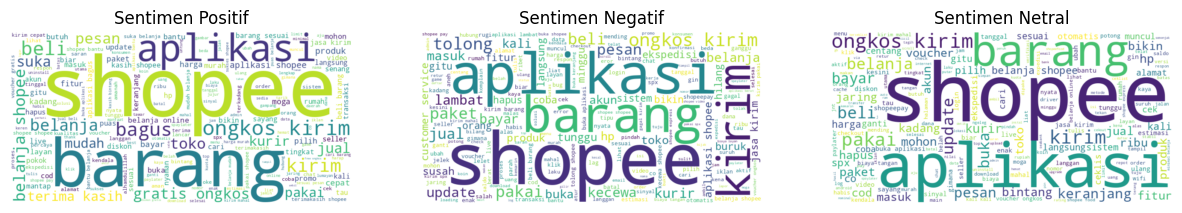

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("/content/stopwords.csv")

# Filter data berdasarkan sentimen
positive = ' '.join(df[df['sentiment'] == 'positif']['stopwords'])
negative = ' '.join(df[df['sentiment'] == 'negatif']['stopwords'])
neutral = ' '.join(df[df['sentiment'] == 'netral']['stopwords'])

# Membuat WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral)

# Menampilkan WordCloud
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Sentimen Positif')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Sentimen Negatif')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Sentimen Netral')
plt.axis('off')

plt.show()


In [ ]:
from collections import Counter

# Filter data berdasarkan sentimen dan gabungkan teks
positive = ' '.join(df[df['sentiment'] == 'positif']['stopwords']).split()
negative = ' '.join(df[df['sentiment'] == 'negatif']['stopwords']).split()
neutral = ' '.join(df[df['sentiment'] == 'netral']['stopwords']).split()

# Hitung frekuensi kata
positive_counter = Counter(positive)
negative_counter = Counter(negative)
neutral_counter = Counter(neutral)

# Tampilkan 5 kata paling umum
print("Positif:", positive_counter.most_common(5))
print("Negatif:", negative_counter.most_common(5))
print("Netral:", neutral_counter.most_common(5))


Positif: [('shopee', 1160), ('barang', 559), ('kirim', 517), ('belanja', 508), ('aplikasi', 498)]
Negatif: [('shopee', 1958), ('kirim', 1360), ('aplikasi', 1041), ('barang', 894), ('pakai', 539)]
Netral: [('shopee', 364), ('kirim', 258), ('aplikasi', 191), ('barang', 161), ('belanja', 130)]
